# Author : Hemang kumawat

**GRIP @ The Sparks Foundation**

**Task 1 : Prediction Using Supervised Machine Learning**

In this regression task I tried to predict the percentage of marks that a student is expected to score based upon the number of hours they studied.

This is a simple linear regression task as it involves just two variables.

# Technical Stack : Sikit Learn, Numpy Array, Pandas, Matplotlib


In [1]:
# Importing the required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# 1. Reading the data from source

In [2]:
# Reading data from remote link
url = r"https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv"
data = pd.read_csv(url)
print("Data Imported Successfully")
data.head(10)


Data Imported Successfully


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


# 2. Check if there is any null value in the Dataset

In [3]:
data.isnull == True

False

There is no null value in the dataset so, we can now visualize the data.

# 3. Visualizing the Data

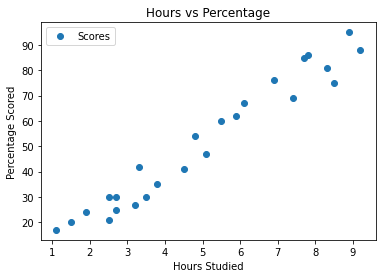

In [4]:

# Plotting the distribution of scores
data.plot(x='Hours', y='Scores', style='o')
plt.title('Hours vs Percentage')
plt.xlabel('Hours Studied')
plt.ylabel('Percentage Scored')
plt.show()

From the above scatter plot there looks to be correlation between the 'Percentage Scored' and 'Hours Studied', Lets plot a regression line to confirm the correlation.

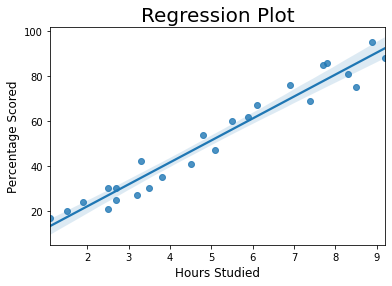

           Hours    Scores
Hours   1.000000  0.976191
Scores  0.976191  1.000000


In [5]:
import seaborn as sns

sns.regplot(x= data['Hours'], y= data['Scores'])
plt.title('Regression Plot',size=20)
plt.ylabel('Percentage Scored', size=12)
plt.xlabel('Hours Studied', size=12)
plt.show()
print(data.corr())

It is confirmed that the variables are positively correlated.


# 4. Data Preprocessing
This step involved division of data into "attributes" (inputs) and "labels" (outputs).

In [6]:

X = data.iloc[:, :-1].values
y = data.iloc[:, 1].values

# 5. Model Training
Splitting the data into training and testing sets, and then training the algorithm

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0) 

regression = LinearRegression()  
regression.fit(X_train.reshape(-1,1), y_train)

print("Training complete.")

Training complete.


# 6. Making Predictions
Now that we have trained our algorithm, it's time to test the model by making some predictions.

For this we will use our test-dataset.

In [8]:

# Testing data
print(X_test)
# Model Prediction 
y_pred = regression.predict(X_test)

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


# 7. Comparing Actual result to the Predicted Model result

In [9]:

# Comparing Actual vs Predicted
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred}) 
df

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


In [10]:
#Estimating training and test score
print("Training Score:",regression.score(X_train,y_train))
print("Test Score:",regression.score(X_test,y_test))

Training Score: 0.9515510725211552
Test Score: 0.9454906892105355


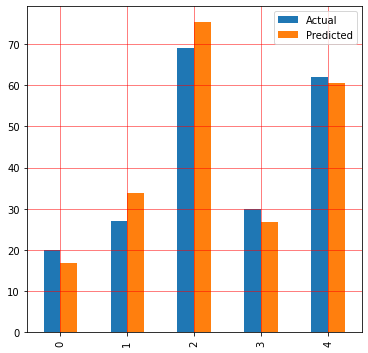

In [11]:
# Plotting the Bar graph to depict the difference between the actual and predicted value

df.plot(kind='bar',figsize=(6,6))
plt.grid(which='major', linewidth='0.5', color='red')
plt.grid(which='minor', linewidth='0.5', color='blue')

plt.show()

### What will be the predicted score of a student if he/she studies for 9.25 hrs/ day?

In [12]:
# Testing the model with our own data

hours = 9.25
test = np.array([hours])
test = test.reshape(-1, 1)
own_pred = regression.predict(test)
print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(own_pred[0]))

No of Hours = 9.25
Predicted Score = 93.69173248737535


# 8. Evaluating the Model

In [13]:
from sklearn import metrics

print('Mean Absolute Error:',metrics.mean_absolute_error(y_test, y_pred)) 
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R-2 Score:', metrics.r2_score(y_test, y_pred))

Mean Absolute Error: 4.183859899002975
Mean Squared Error: 21.598769307217406
Root Mean Squared Error: 4.647447612100367
R-2 Score: 0.9454906892105355


## R-2 Score gives the score of model fit and in this case we have R-2 = 0.9454906892105355 which is actually a great score for this model.
# Conclusion
I was successfully able to carry-out Prediction using Supervised ML task and was able to evaluate the model's performance on various parameters.

# Thank You